In [1]:
import os
import numpy as np
import random
import torch

from torch.utils.data import DataLoader, random_split

from Callbacks import EarlyStopping
from TransferLearningModel import TransferLearningModel
from utils import DICOMFlatDataset, TransformDataset, TransformDatasetBalanced, find_overlapping_images, remove_overlapping_images, TensorFolderDataset

In [ ]:
# Definition of the Scenario, if Data Augmentation is Applied and the folder to store the weights
data_augmentation = True
scenario = 1
save_folder_base = f"./data/scenario{scenario}_flat/"

In [ ]:
# Definition of the Data Folder and the initially set variables 
BASE_DIR = "C:/Users/Dominik Hahn/OneDrive/Studium/Master/Masterarbeit/Daten"
seed = 41
batch_size = 32
classes = ["A", "B", "E", "G", "N"]
train_ratio = 0.6

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

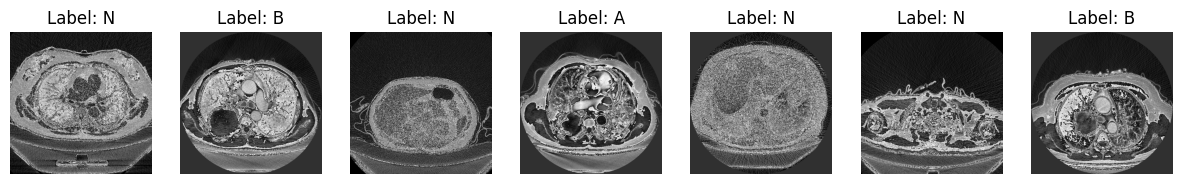

In [ ]:
# Visualization of different CT images from the Dataset with their correspongind labels
classes_dict = {value: index for index, value in enumerate(classes)}
dataset = DICOMFlatDataset(root_dir=BASE_DIR, classes=classes_dict, scenario=scenario, balance_n=True)
dataset.visualize_images(num_images=7)

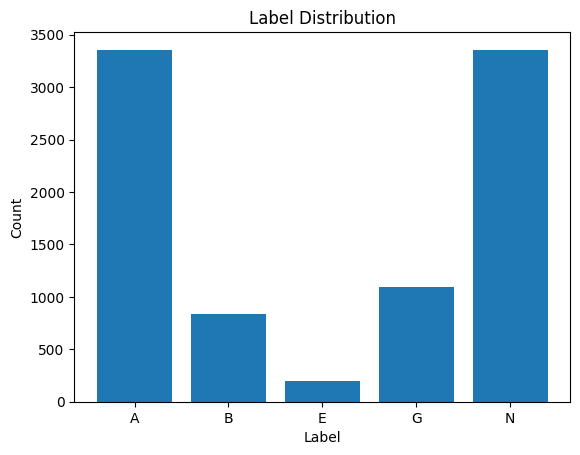

In [ ]:
# Visualization of the Label Distribution within the dataset
dataset.display_label_distribution()

In [ ]:
# Calculation of the Train, Validation and Test Size
train_size = int(train_ratio * len(dataset))
val_size = int(((1-train_ratio)/2) * len(dataset)) 
test_size = len(dataset) - train_size - val_size

print(f"Train size: {train_size} --- Validation size: {val_size} --- Test size: {test_size}")

Train size: 5310 --- Validation size: 1770 --- Test size: 1770


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.980906..2.4830637].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8308978..2.306852].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0438843].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8509659..2.1473734].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.6748575].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0084326..2.3914297].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1171381..2

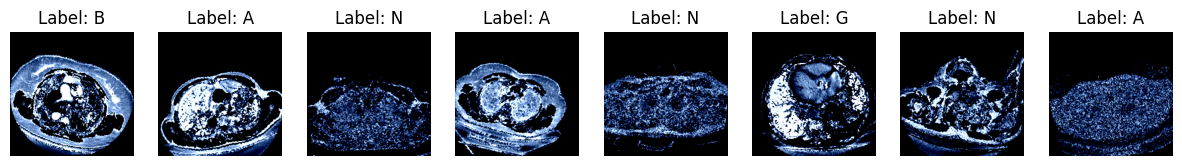

In [ ]:

# Visualization of CT images of the Dataset with the application of random data augmentation techniques
from utils import display_data_loader_batch
display_model = TransferLearningModel(classes, "efficientnet", data_augmentation=True, fine=False, scenario=1)
display_model.train_transforms, display_model.test_transforms = display_model.get_transforms()
train_indices, val_indices, test_indices = random_split(dataset, [train_size, val_size, test_size])
train_dataset = TransformDataset(torch.utils.data.Subset(dataset, train_indices.indices), transform=display_model.train_transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
display_data_loader_batch(train_loader, classes)

In [8]:
train_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "train"))
val_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "val"))
test_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "test"))

c:\Users\Dominik Hahn\Documents\GitHub\Masterarbeit\Final Models\utils.py:551: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


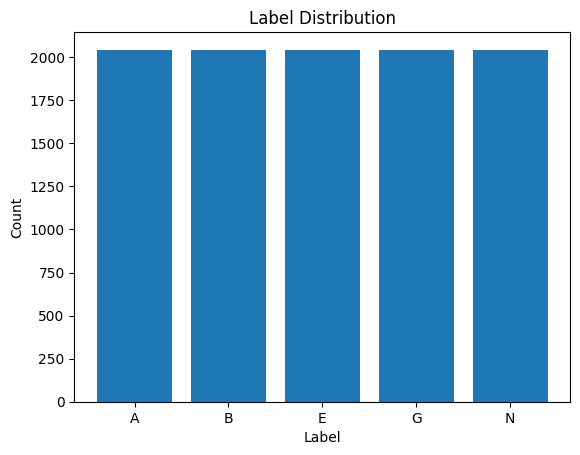

In [ ]:
# Balancing of the dataset and visualization of the balanced label distribution
train_dataset = TransformDatasetBalanced(train_dataset_base, classes=classes_dict)
train_dataset.display_label_distribution()

In [ ]:
# Check for overlapping images in the different dataset splits
remove_indices = find_overlapping_images(val_dataset_base, train_dataset_base, logging=False)
remove_indices.extend(find_overlapping_images(test_dataset_base, train_dataset_base, logging=False))
remove_indices_val = find_overlapping_images(test_dataset_base, val_dataset_base, logging=False)
train_dataset_base_filtered = remove_overlapping_images(train_dataset_base, remove_indices)
val_dataset_base_filtered = remove_overlapping_images(val_dataset_base, remove_indices_val)
find_overlapping_images(train_dataset_base_filtered, val_dataset_base)
find_overlapping_images(train_dataset_base_filtered, test_dataset_base)
find_overlapping_images(val_dataset_base_filtered, test_dataset_base)

c:\Users\Dominik Hahn\Documents\GitHub\Masterarbeit\Final Models\utils.py:551: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Found 0 overlapping images
Found 0 overlapping images
Found 0 overlapping images


[]

Train size: 10210 --- Validation size: 3475 --- Test size: 1770
Epoch 1/50 ----- Loss: 0.8665, Accuracy: 65.43% ----- Validation Loss: 0.6813, Validation Accuracy: 73.96%
Epoch 2/50 ----- Loss: 0.4884, Accuracy: 80.72% ----- Validation Loss: 0.4697, Validation Accuracy: 82.96%
Epoch 3/50 ----- Loss: 0.3753, Accuracy: 85.51% ----- Validation Loss: 0.3996, Validation Accuracy: 84.35%
Epoch 4/50 ----- Loss: 0.3245, Accuracy: 87.13% ----- Validation Loss: 0.3553, Validation Accuracy: 86.53%
Epoch 5/50 ----- Loss: 0.2747, Accuracy: 89.34% ----- Validation Loss: 0.3113, Validation Accuracy: 89.61%
Epoch 6/50 ----- Loss: 0.2536, Accuracy: 89.91% ----- Validation Loss: 0.3421, Validation Accuracy: 87.68%
Epoch 7/50 ----- Loss: 0.2247, Accuracy: 90.95% ----- Validation Loss: 0.3623, Validation Accuracy: 88.26%
Epoch 8/50 ----- Loss: 0.2010, Accuracy: 92.22% ----- Validation Loss: 0.2940, Validation Accuracy: 90.27%
Epoch 9/50 ----- Loss: 0.1882, Accuracy: 92.83% ----- Validation Loss: 0.3071, V

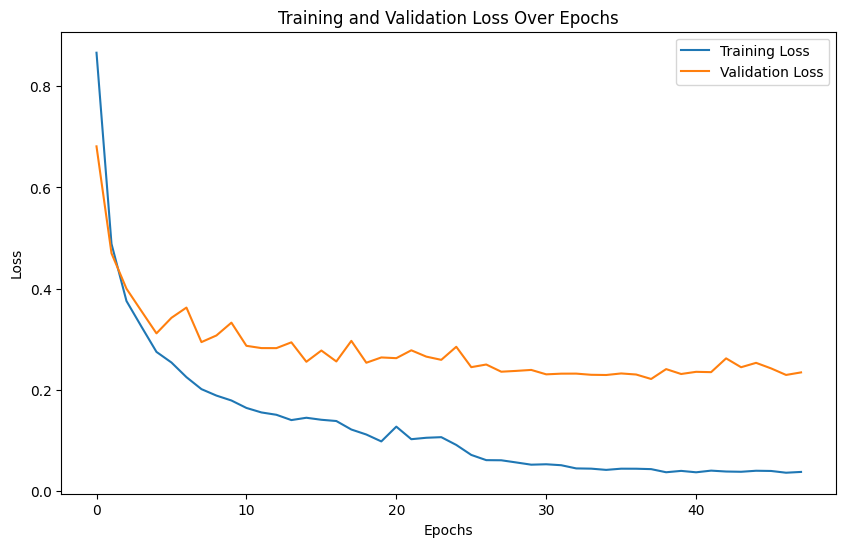

In [ ]:
# Execution of the training phase of the flat Efficientnet Model
model = TransferLearningModel(classes, "efficientnet", data_augmentation=data_augmentation, scenario=scenario, flat=True)
model.train_transforms, model.test_transforms = model.get_transforms()
# Apply specific transforms to each balanced subset
train_dataset = TransformDatasetBalanced(train_dataset_base_filtered, classes=classes_dict, transform=model.train_transforms)
val_dataset = TransformDatasetBalanced(val_dataset_base_filtered, classes=classes_dict, transform=model.test_transforms)
test_dataset = TransformDataset(test_dataset_base, transform=model.test_transforms)

print(f"Train size: {len(train_dataset)} --- Validation size: {len(val_dataset)} --- Test size: {len(test_dataset)}")
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
# Initialize early stopping
early_stopping = EarlyStopping(patience=10)
# Train the current model
model.train(train_loader, val_loader, early_stopping, epochs=50)

Evaluation Accuracy on unseen data: 91.92090395480226


<Figure size 1000x800 with 0 Axes>

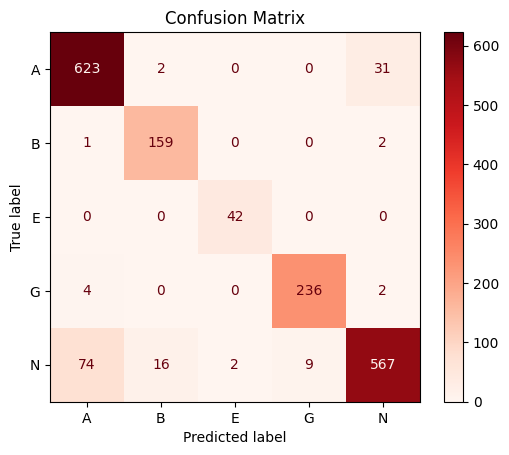

In [ ]:
# Evaluation of the flat classification model
model.evaluate(test_loader)